In [1]:
import numpy as np
import pandas as pd

from gtda.time_series import SlidingWindow
from gtda.diagrams import PersistenceLandscape
from gtda.homology import VietorisRipsPersistence

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
pd.set_option('display.max_columns', None)
import seaborn as sns
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import MinMaxScaler
# !pip install spectrum 
# from spectrum.periodogram import speriodogram

import statsmodels
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.arima_process import ArmaProcess

from pylab import *

In [2]:
# Functions to compute the Lp norms
# Find the range of x values from the persistence diagram:
def Ftseq(diagram):
    births =[]
    deaths =[]
    for pair in diagram:
        if pair[2] == 1:
            births.append(pair[0])
            deaths.append(pair[1])
    return np.linspace(min(births), max(deaths), 100)

# Calculate Lp norm:
def Lpnorm(tseq, landscapevalues, p = 1):
    norms = []
    if p.lower() == 'auc':
        for point in zip(tseq,landscapevalues):
            norms.append(np.trapz(landscapevalues, tseq))
    else: 
        for point in zip(tseq,landscapevalues):
            norms.append(np.linalg.norm(point, p))        
    return sum(norms)

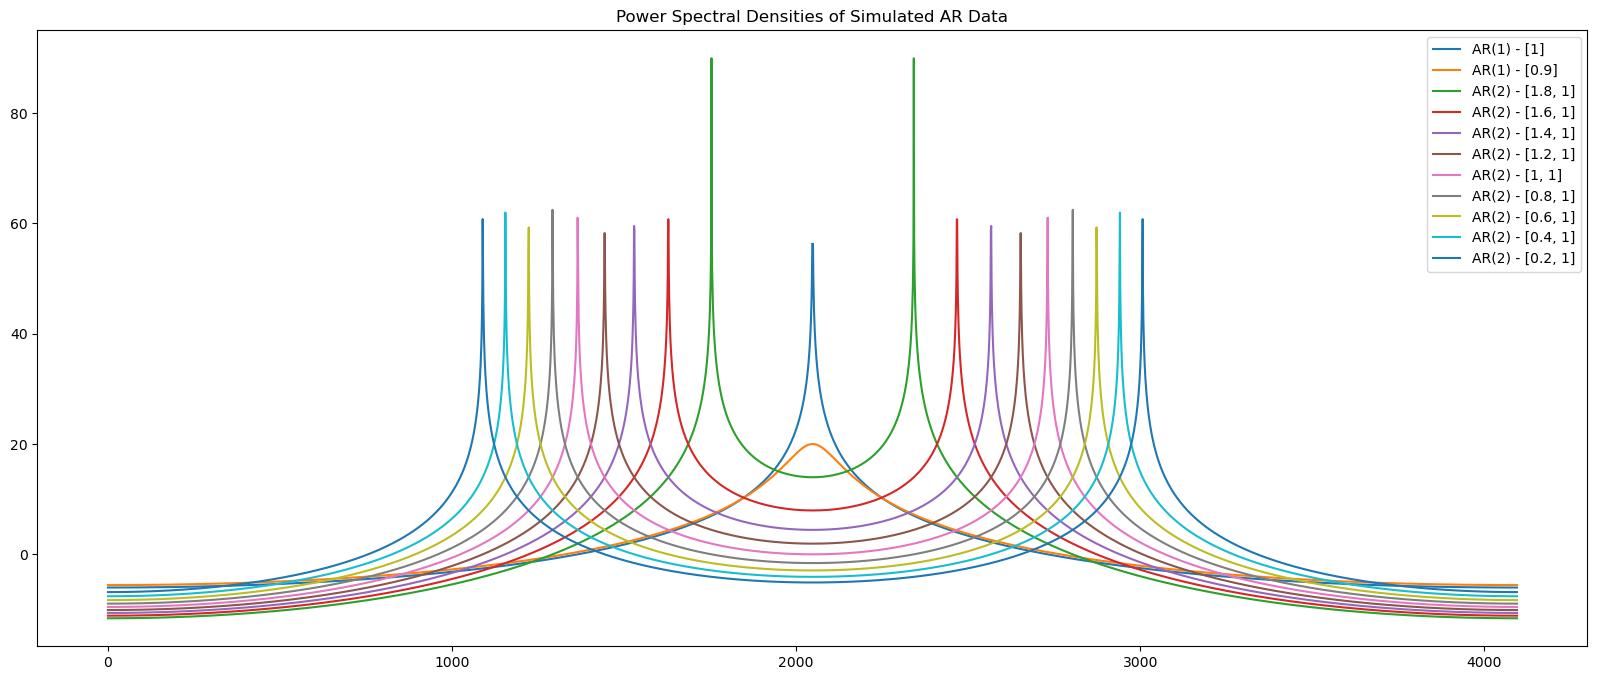

In [3]:
import spectrum.arma
from pylab import plot, log10, legend

plt.figure(figsize = (20,8), facecolor = 'white')
# plt.subplot(2,1,1)
arterms = [1]
plot(10*log10(spectrum.arma.arma2psd(arterms,None)), label= 'AR(' + str(len(arterms)) + ') - '  +str(arterms))
arterms = [.9]
plot(10*log10(spectrum.arma.arma2psd(arterms,None)), label= 'AR(' + str(len(arterms)) + ') - '  +str(arterms))
arterms = [1.8,1]
plot(10*log10(spectrum.arma.arma2psd(arterms,None)), label= 'AR(' + str(len(arterms)) + ') - '  +str(arterms))
arterms = [1.6,1]
plot(10*log10(spectrum.arma.arma2psd(arterms,None)), label= 'AR(' + str(len(arterms)) + ') - '  +str(arterms))
arterms = [1.4,1]
plot(10*log10(spectrum.arma.arma2psd(arterms,None)), label= 'AR(' + str(len(arterms)) + ') - '  +str(arterms))
arterms = [1.2,1]
plot(10*log10(spectrum.arma.arma2psd(arterms,None)), label= 'AR(' + str(len(arterms)) + ') - '  +str(arterms))
arterms = [1,1]
plot(10*log10(spectrum.arma.arma2psd(arterms,None)), label= 'AR(' + str(len(arterms)) + ') - '  +str(arterms))
arterms = [.8,1]
plot(10*log10(spectrum.arma.arma2psd(arterms,None)), label= 'AR(' + str(len(arterms)) + ') - '  +str(arterms))
arterms = [.6,1]
plot(10*log10(spectrum.arma.arma2psd(arterms,None)), label= 'AR(' + str(len(arterms)) + ') - '  +str(arterms))
arterms = [.4,1]
plot(10*log10(spectrum.arma.arma2psd(arterms,None)), label= 'AR(' + str(len(arterms)) + ') - '  +str(arterms))
arterms = [.2,1]
plot(10*log10(spectrum.arma.arma2psd(arterms,None)), label= 'AR(' + str(len(arterms)) + ') - '  +str(arterms))

plt.title('Power Spectral Densities of Simulated AR Data')
legend()


# plt.subplot(2,1,2)
# arterms = [.5]
# plot(10*log10(spectrum.arma.arma2psd(arterms,None)), label= 'AR(' + str(len(arterms)) + ') - '  +str(arterms))
# arterms = [.9]
# plot(10*log10(spectrum.arma.arma2psd(arterms,None)), label= 'AR(' + str(len(arterms)) + ') - '  +str(arterms))
# plt.title('AR Power Comparison')
# legend()

In [ ]:
import numpy as np
import pandas as pd

from gtda.time_series import SlidingWindow
from gtda.diagrams import PersistenceLandscape
from gtda.homology import VietorisRipsPersistence

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
pd.set_option('display.max_columns', None)
import seaborn as sns
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import MinMaxScaler
# !pip install spectrum 
# from spectrum.periodogram import speriodogram

import statsmodels
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.arima_process import ArmaProcess

from pylab import *

# Functions to compute the Lp norms
# Find the range of x values from the persistence diagram:
def Ftseq(diagram):
    births =[]
    deaths =[]
    for pair in diagram:
        if pair[2] == 1:
            births.append(pair[0])
            deaths.append(pair[1])
    return np.linspace(min(births), max(deaths), 100)

# Calculate Lp norm:
def Lpnorm(tseq, landscapevalues, p = 1):
    norms = []
    if p.lower() == 'auc':
        for point in zip(tseq,landscapevalues):
            norms.append(np.trapz(landscapevalues, tseq))
    else: 
        for point in zip(tseq,landscapevalues):
            norms.append(np.linalg.norm(point, p))        
    return sum(norms)

import spectrum.arma
from pylab import plot, log10, legend

plt.figure(figsize = (20,8), facecolor = 'white')
# plt.subplot(2,1,1)
arterms = [1]
plot(10*log10(spectrum.arma.arma2psd(arterms,None)), label= 'AR(' + str(len(arterms)) + ') - '  +str(arterms))
arterms = [.9]
plot(10*log10(spectrum.arma.arma2psd(arterms,None)), label= 'AR(' + str(len(arterms)) + ') - '  +str(arterms))
arterms = [1.8,1]
plot(10*log10(spectrum.arma.arma2psd(arterms,None)), label= 'AR(' + str(len(arterms)) + ') - '  +str(arterms))
arterms = [1.6,1]
plot(10*log10(spectrum.arma.arma2psd(arterms,None)), label= 'AR(' + str(len(arterms)) + ') - '  +str(arterms))
arterms = [1.4,1]
plot(10*log10(spectrum.arma.arma2psd(arterms,None)), label= 'AR(' + str(len(arterms)) + ') - '  +str(arterms))
arterms = [1.2,1]
plot(10*log10(spectrum.arma.arma2psd(arterms,None)), label= 'AR(' + str(len(arterms)) + ') - '  +str(arterms))
arterms = [1,1]
plot(10*log10(spectrum.arma.arma2psd(arterms,None)), label= 'AR(' + str(len(arterms)) + ') - '  +str(arterms))
arterms = [.8,1]
plot(10*log10(spectrum.arma.arma2psd(arterms,None)), label= 'AR(' + str(len(arterms)) + ') - '  +str(arterms))
arterms = [.6,1]
plot(10*log10(spectrum.arma.arma2psd(arterms,None)), label= 'AR(' + str(len(arterms)) + ') - '  +str(arterms))
arterms = [.4,1]
plot(10*log10(spectrum.arma.arma2psd(arterms,None)), label= 'AR(' + str(len(arterms)) + ') - '  +str(arterms))
arterms = [.2,1]
plot(10*log10(spectrum.arma.arma2psd(arterms,None)), label= 'AR(' + str(len(arterms)) + ') - '  +str(arterms))

plt.title('Power Spectral Densities of Simulated AR Data')
legend()


# plt.subplot(2,1,2)
# arterms = [.5]
# plot(10*log10(spectrum.arma.arma2psd(arterms,None)), label= 'AR(' + str(len(arterms)) + ') - '  +str(arterms))
# arterms = [.9]
# plot(10*log10(spectrum.arma.arma2psd(arterms,None)), label= 'AR(' + str(len(arterms)) + ') - '  +str(arterms))
# plt.title('AR Power Comparison')
# legend()

## Experiment of AR Term Magnitude vs Lp Norms

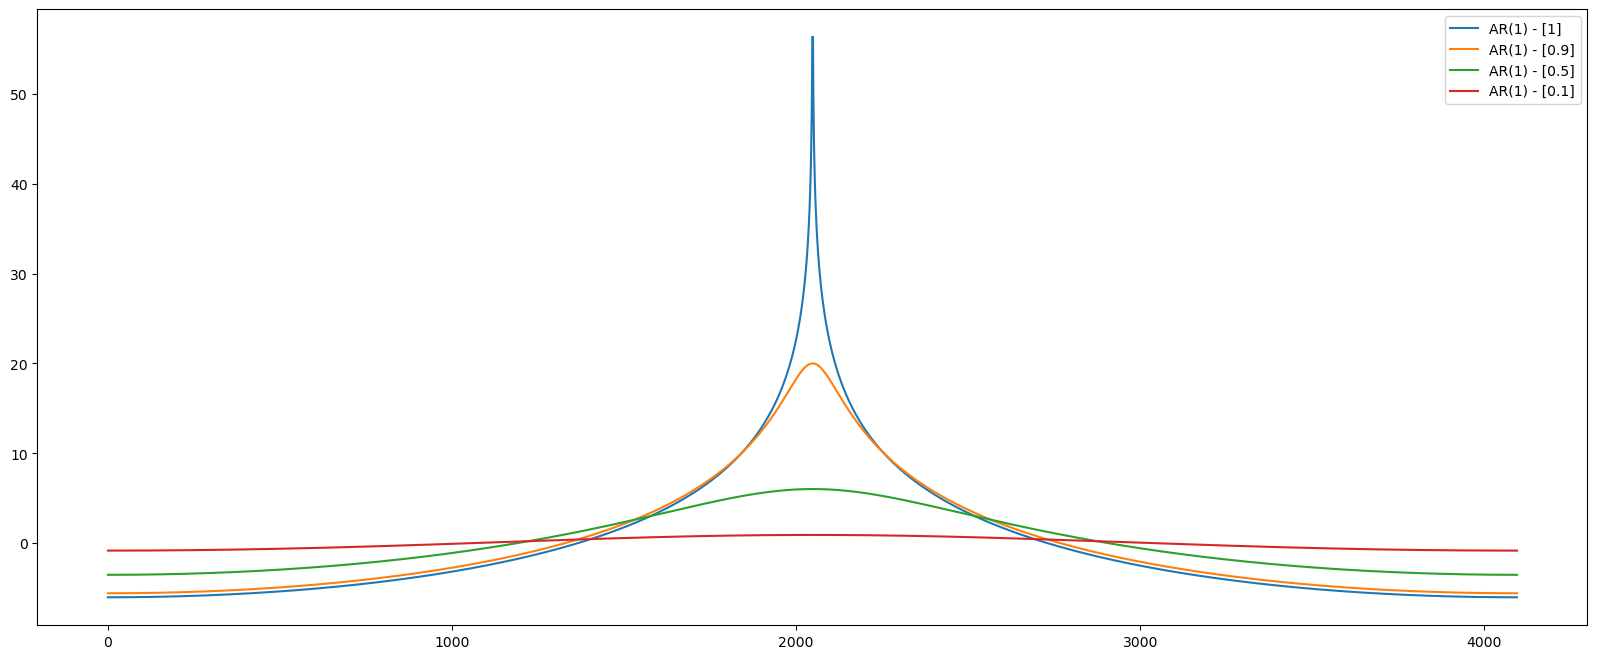

In [86]:
plt.figure(figsize = (20,8), facecolor = 'white')
arterms = [1]
plot(10*log10(spectrum.arma.arma2psd(arterms,None)), label= 'AR(' + str(len(arterms)) + ') - '  +str(arterms))
arterms = [.9]
plot(10*log10(spectrum.arma.arma2psd(arterms,None)), label= 'AR(' + str(len(arterms)) + ') - '  +str(arterms))
arterms = [.5]
plot(10*log10(spectrum.arma.arma2psd(arterms,None)), label= 'AR(' + str(len(arterms)) + ') - '  +str(arterms))
arterms = [.1]
plot(10*log10(spectrum.arma.arma2psd(arterms,None)), label= 'AR(' + str(len(arterms)) + ') - '  +str(arterms))
legend()

In [96]:
nx, ny = (6, 6)
xlinspace = np.linspace(0, 1, nx)
ylinspace = np.linspace(0, 1, nx)
# full coordinate arrays
xx, yy = np.meshgrid(xlinspace, ylinspace)

In [143]:
for i in range(nx):
    for j in range(ny):
        print(xx[i,j], yy[i,j])

0.0 0.0
0.2 0.0
0.4 0.0
0.6000000000000001 0.0
0.8 0.0
1.0 0.0
0.0 0.2
0.2 0.2
0.4 0.2
0.6000000000000001 0.2
0.8 0.2
1.0 0.2
0.0 0.4
0.2 0.4
0.4 0.4
0.6000000000000001 0.4
0.8 0.4
1.0 0.4
0.0 0.6000000000000001
0.2 0.6000000000000001
0.4 0.6000000000000001
0.6000000000000001 0.6000000000000001
0.8 0.6000000000000001
1.0 0.6000000000000001
0.0 0.8
0.2 0.8
0.4 0.8
0.6000000000000001 0.8
0.8 0.8
1.0 0.8
0.0 1.0
0.2 1.0
0.4 1.0
0.6000000000000001 1.0
0.8 1.0
1.0 1.0


In [94]:
nx, ny = (6, 6)
xlinspace = np.linspace(0, 1, nx)
ylinspace = np.linspace(0, 1, nx)
# full coordinate arrays
xx, yy = np.meshgrid(xlinspace, ylinspace)

zz = []


for i in range(nx):
    for j in range(ny):

        n = 1000
        
        arterms1 = [xx[i,j]]
        ar = np.append([1], arterms1)
        ma = np.array([1])
        AR_object = ArmaProcess(ar, ma)
        simulated_data1 = AR_object.generate_sample(nsample=n, burnin = 1000)
        
        
        arterms2 = [yy[i,j], yy[i,j]]
        ar = np.append([1], arterms2)
        ma = np.array([1])
        AR_object = ArmaProcess(ar, ma)
        simulated_data2 = AR_object.generate_sample(nsample=n, burnin = 1000)


        simulated_data = pd.DataFrame({'Simulated Data 1' : simulated_data1,
                      'Simulated Data 2' : simulated_data2
                     })

        dataPct = simulated_data.pct_change()
        dataPct = simulated_data.dropna()
        dataPct.head()

        # Create point cloud of size 60 and stride 1
        window_size = 15
        stride = 1
        df = dataPct
        X = df
        y = df.index
        SW = SlidingWindow(size=window_size, stride=stride)
        X_sw, yr = SW.fit_transform_resample(X, y)

        # Calculate the norms for each of the windows in the multivariate sliding window

        # Initialize empty list
        Norms = np.empty(window_size)
        Norms[:] = np.nan
        Norms = list(Norms)
        vrp = VietorisRipsPersistence()
        pl = PersistenceLandscape()
        for pointcloud in X_sw:
            persistencediagram = vrp.fit_transform(pointcloud.reshape(1, *pointcloud.shape))
            landscapedata = pl.fit_transform(persistencediagram)
            tseq = Ftseq(persistencediagram[0])
            yvalues = landscapedata[0][1]
            Norms.append(Lpnorm(tseq, yvalues, p = 'auc'))
        
        zz.append(pd.Series(Norms).mean())
        
zz = np.array(zz)
zz = zz.reshape(nx,ny)

KeyboardInterrupt: 

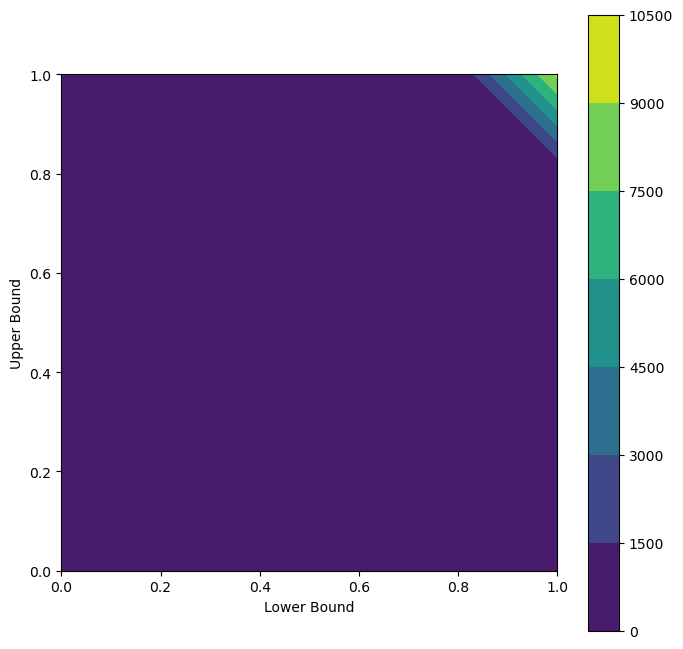

In [88]:
plt.figure(figsize = (8,8), facecolor = 'white')
h = plt.contourf(xlinspace, ylinspace, zz)
plt.axis('scaled')
plt.colorbar()
plt.xlabel('Lower Bound')
plt.ylabel('Upper Bound')
plt.show()

<AxesSubplot:xlabel='Simulated Data 1', ylabel='Simulated Data 2'>

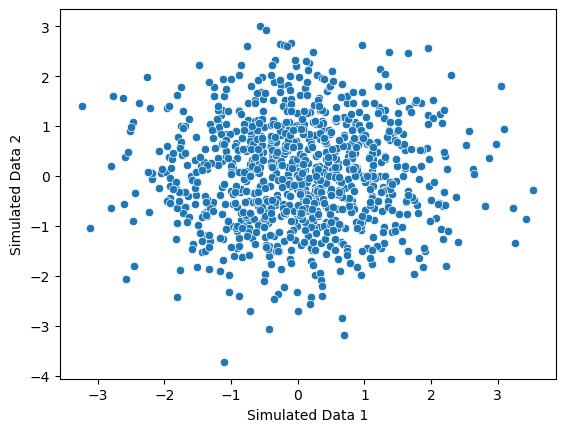

In [95]:
sns.scatterplot(simulated_data['Simulated Data 1'], simulated_data['Simulated Data 2'])